# Empalme con la clase anterior
Podemos pensar en el metodo de la silueta como una funcion

\begin{eqnarray}
s : A &\to& \mathbb{R} \\
x_{Ii} &\mapsto& s_{iI}
\end{eqnarray}
con
$$A = \cup_{I=1}^n C_I $$

* Normalmentte $s_{iI}$ es mayor que cero.
* $s_{iI}=0$ indica que la cohesion y la separacion coinciden. O sea que el punto esta en el medio entre los de misma mesa y los demas de otra mesas. (poco comun).

* $s_{iI} \le 1$. Es 1 cuando $a_{iI}=0$. Caso excepcional.
Mejor $s_{iI}<1$ . Si $s_{iI} \approx 1$, es bueno.

* Si $s_{iI}<0$ (negativo) estamos en lado equivocado.


[Python Silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Existen otros metodos para clustering:
* Density Based Clustering DBSCAN
* HDBSCA: Hierarchical Density Based Scan

Vamos a ver por comparacion un ejemplo donde estan los distintos
metodos. Aca Kernel Kmeans es, como lo dice el nombre kmeans con kernel.

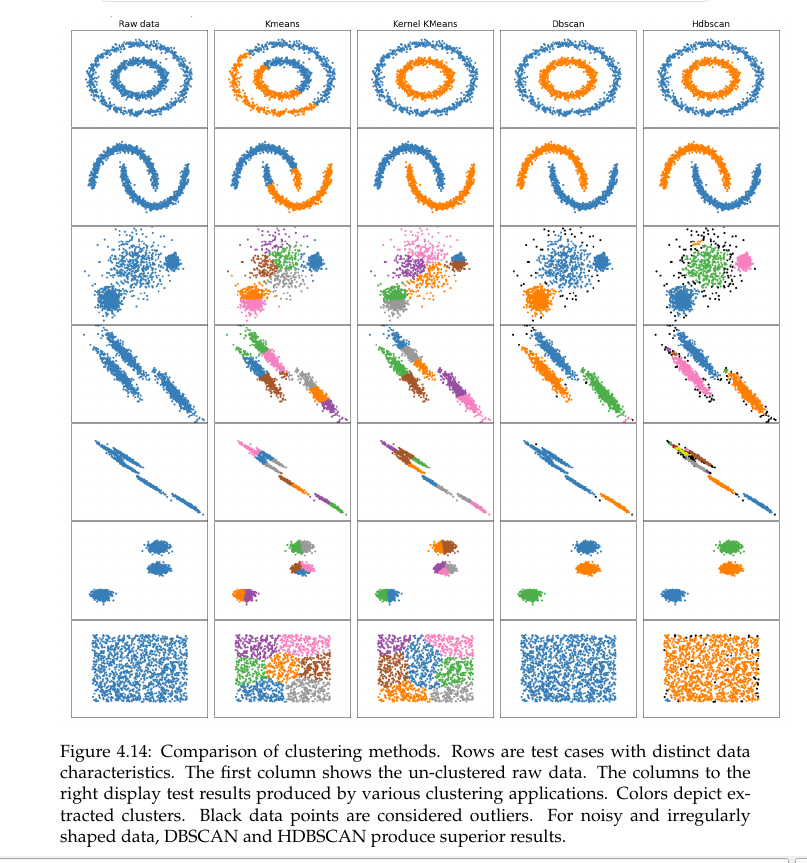

# Reduccion de dimensionalidad.
En muchas situaciones es necesario o conveniente reducir el tamanho de los datos. Reducir la dimension. Varias razones:

* **Compresion** para mandar por email, o para mejor (mas veloz y menos memoria) proceso.
Un ejemplo sencillo para mostar la importancia de la reduccion de dimensionalidad. Piense en esta recta
$$(2 t, 0, 0, \cdots, 0  \cdots, 0) \in \mathbb{R}^{1000000}$$

Realmente todos esos $0$ son esponja, porosidad, sobran.
Matematicamente solo necesito la funcion $t \mapsto 2t$.

Hay un topico que se llama "la maldicion de la dimensionalidad"
[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) esto muestra las consequencias de tener datos en dimensiones muy grandes.

* **Interpretacion**: Nosotros escribimos en hojas $2D$ y las pantallas de nuestros dispositivos son $2D$. Entonces
si tenemos unos datos en, por ejemplo, 14 dimensiones, como se interpretan?

Una manera de reducir dimensiones es proyectando los datos a espacios mas reducidos. Vamos a ver el metodo de PCA: **Principal Component Analysis**.

Veamos una grafica para introducir el concepto.



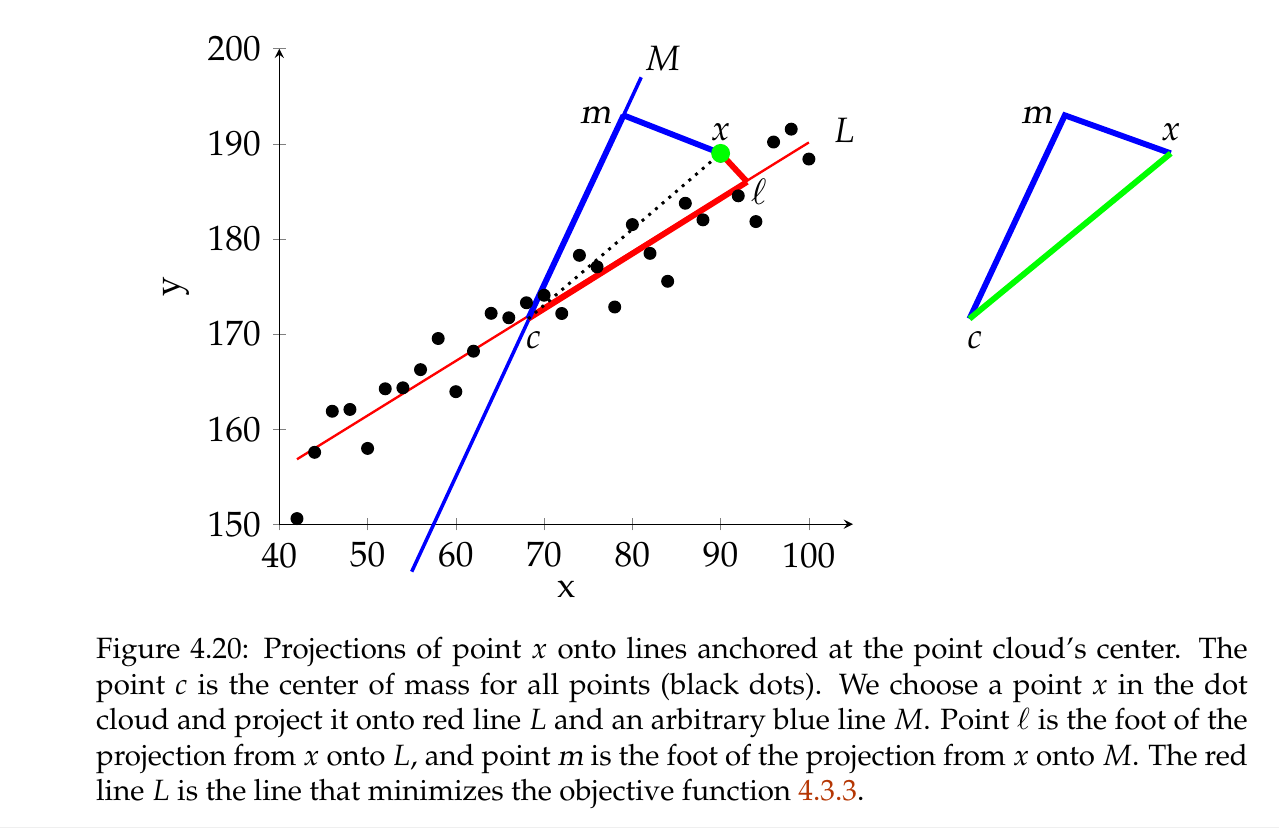

Resumen de lo que hable

* Se tiene una nube de puntos en $\mathbb{R}^2$ (en cualquier espacio.

* Se calcula el centro geometrico $c=  \frac1m \sum x_i$.

* Sobre el centro geometrico puede girar una linea (hasta 359.9999 grados)

* Propongo **minimizar** la suma de las distancias entre estos puntos y la recta girada un angulo $\theta$.

Vamos a cuantificar este problema.

Observe el triangulo verde y azul de la derecha superior.  Sea $d(a,b)$ la distancia entre dos puntos $a,b$.

Por el teorema de Pitagoras tenemos:

$$d(x,c)^2 = d(x,m)^2 + d(m,c)^2 \tag{1}$$
Es mejor trabajar con el centro $c$ en el origen.
Para esto basta restar la media a todos los puntos y asi el origen es el nuevo centro $c=0=(0,0)$.
En este caso la ecuacion (1) es

$$ \| x \|^2 = \| x - m \|^2 + \| m \|^2 \tag{2} $$
(recuerden:
$$ \| x \|^2 = \langle x, x \rangle = x^T x = \sum_{i=1}^n x_i^2 $$

Quisieramos ajustar los puntos a una recta y **minimizar** el error que es la suma de las distancias al cuadrado.

La primera funcion de costo que se nos ocurre

$$J_0(\theta) = \sum_{i=1}^m \| x_i - m_i \|^2  $$

Observemos ahora la ecuacion (2). El angulo $\theta$ que la recta giratoria (azul) hace con el eje $x$ es constante para el punto $x$. De forma que la suma
es constante para ese $\| x \|^2$. En la suma (2)
los terminos de la derecha se contrarestan (trade off).
Si el uno es grande el otro es pequeho. Es como decir que dos numeros suman 5, si uno es 1 el otro es 4, si uno es 2 el otro es 3. Cuando uno crece, el otro decrece en la misma proporcion. Entonces hallar el **minimo** de la suma de los primeros terminos ($J_0(\theta)) es equivalente a hallar el **maximo** de la suma de los segundos terminos. Entonces definimos otra funcion de costo.

$$J(\theta) = \sum_{i=1}^m \| m_i \|^2 $$
La cual queremos **maximizar**.
Vamos a ver que esta suma relamente tiene una intreptacion estadistica interesante: **disperion** (varianza).

Veamos el siguiente ejemplo
[animacion de este proceso](https://drive.google.com/file/d/1Uv5_PXDJ-KRV7qZMqZzdOs1jzblcTipq/view)
se ve una recta girando y lo ideal es que los puntos rojos (proyeccion de los azules que son los datos, sobre la recta) genera la **maxima dispersion** (estan lo mas **regados posible**).

En este momento recordamos los conceptos del algebra lineal.  Recordemos la proyeccion. Si un vector $u$ es normal, podemos proyectar un vector $v$ sobre $u$ el tamanho de la proyeccion es $\langle v, u \rangle = u \cdot v$.
En nuestro caso, la linea giratoria tiene un angulo $\theta$. El vector unitario sobre esta linea es
$$u=(\cos \theta, \sin \theta). $$
La proyeccion de un punto en la linea giratoria es
$m_i = (x_i \cdot u) u$.

Queremos **maximar** la suma $\| m_i \|^2$, entonces
donde $\| m_i \|^2 = (x_i \cdot u)^2$.
Esto lo podemos escribir en forma vectorial


Sea $X$ la matriz de datos donde cada dato es una fila

$$ X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix} $$
Tenemos entonces que

$$J(\theta) = \| X u \|^2 = u^T X^T X u =\sum_{i=1}^m (x_i \cdot u) u_i $$

Varias observaciones de aca:

* $X^T X$ se llama la matriz de **covarianza** de los datos.

* Recuerden el cociente de Rayleigh. $J(\theta)$ es el cociente de Rayleigh para $u$.

* Probamos antes que el **mas grande** (el maximo de $J(\theta)$ coincide con el autovalor $\lambda_1$ mas grande. Es decir
$$\lambda_1 = \max J(\theta) $$

La interpretacion es entonces que $\lambda_1$ es mide la mayor dispersion de los datos y el correspondiente autovector $u_1$ mide la direccion de esta dispersion.



Veamos otra figura que expliqe esto.

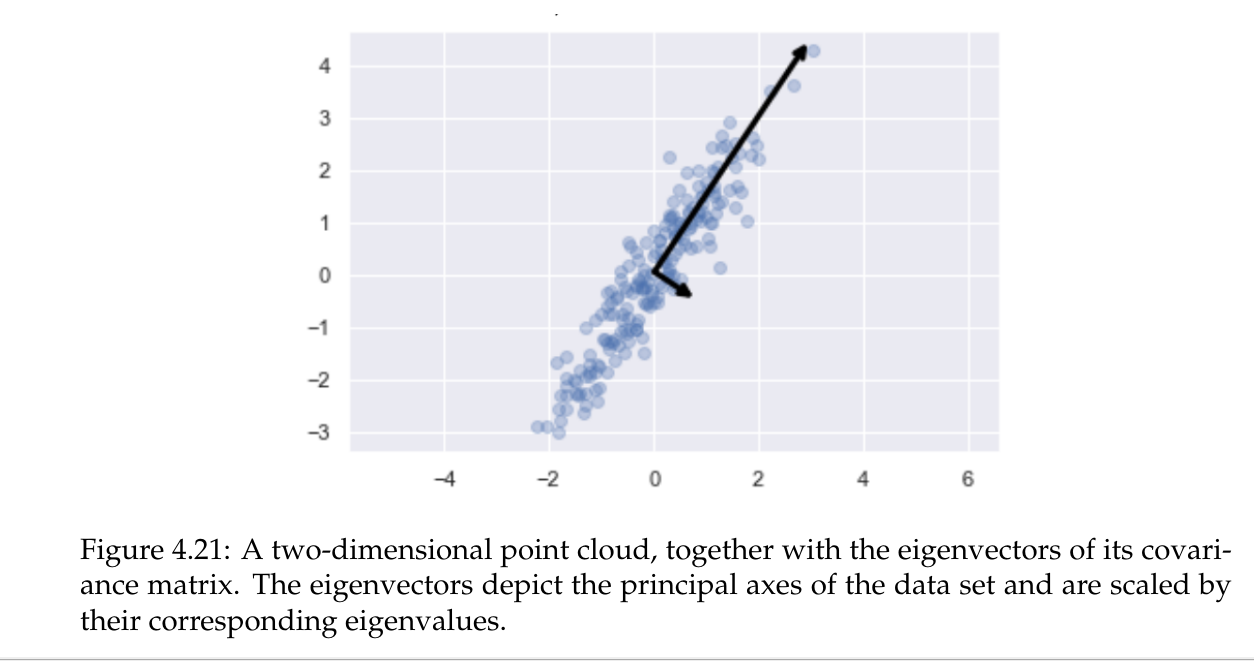

El vector mas grande es la direccion principal y tiene la direccion de $u_1$ (el autovector correspondiete a $\lambda_1$ que mide la dispersion de los puntos.

...y el vector mas pequenho que?
Vamos a encontrar el radio de Rayleigh cuando **excluimos** la direccion principal.

$$R(A, u) = \max_{\| u \|=1, u \perp u_1} = \lambda_2 $$

En general podemos seguir en esa linea para $\mathbb{R}^n$.

Esto nos genera los autovalores. Ver
[Courant minimax principle](https://en.wikipedia.org/wiki/Courant_minimax_principle).

Recuerden el SVD: Signular Value Decomposition.
Como se encuentra el SVD de la matriz $X$?

* Recuerden, se calcula $X^T X$
* Se hallan los autovalores/vectores de $X^T X$.
La raiz cuadrada de estos autovalores son los valores singulares del SVD.


## Reduccion de Dimensionalidad con SVD:
Tenemos la matriz $X=U \Lambda V^T $
entonces

La matriz de covarianza es:
$$X^T X = (V^T \Lambda^T U^T)(U \Lambda V^T) = V \Lambda^2 V^T$$
donde $\Lambda^2 = \Lambda^T \Lambda$ es la matriz de
autovalores de $X^T X$.

Una vez la matriz $V$ se conoce , se conocen las direcciones principales de la matriz de covarianza $\Sigma = X^T X$.

Donde esta la compresion? Se define un umbral bajo el cual se eliminan todas las dimensiones donde
$\lambda_i < umbral$. La maxima dimension por encima de ese umbral la llamamos $k$. Entonces en vez de considerar $V$ como la matriz completa definimos a una matriz truncada

$$W = [ V_1 | V_2 | \cdots | V_k ] $$

Sobre esta matriz vamos a proyectar nuestros datos


$$z_{ji} = \langle x_j, v_i \rangle , j=1,2, \cdots, m \quad , i=1, 2, \cdots, k $$
Se supone que $k \ll n$

Matricialmente tenemos

$$ Z = XW $$.

En la proxima clase:
* Repasamos lo visto hoy
* Formulamos el algoritmo de compresion (que practicamente lo hicimos en las pocas lineas de arriba).
* Como se recupera $X$ desde $Z$.
